# Gambar: Memuat Data & Visualisasi

Gambar digital adalah representasi sinyal dua dimensi (2D) yang terdiri dari kumpulan pixel yang disusun dalam bentuk grid. Setiap pixel memiliki nilai intensitas yang menentukan warna atau kecerahan pada posisi tertentu. Dalam pemrosesan gambar, kita bekerja dengan matriks nilai yang merepresentasikan informasi visual.

## Tujuan Akhir Sesi:

- **Membaca file gambar** dari disk dengan berbagai format (JPG, PNG, BMP)
- **Menampilkan gambar** dengan benar menggunakan sistem warna RGB
- **Memahami informasi dasar gambar** seperti dimensi, jumlah channel, dan mode warna
- **Membuat histogram warna sederhana** untuk analisis distribusi intensitas pixel

**Catatan:** Sesi ini fokus pada visualisasi dan pemahaman dasar representasi gambar digital, bukan pada manipulasi atau transformasi gambar yang kompleks.

In [2]:
# Setup & Instalasi - Pastikan semua paket terinstal (opsional), disarankan untuk diinstal dari terminal
# !pip install -q matplotlib pillow opencv-python numpy

# Import semua library yang dibutuhkan
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import numpy as np
import os

# Tampilkan versi pustaka untuk memastikan kompatibilitas
print("Versi pustaka yang digunakan:")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"PIL (Pillow): {Image.__version__}")
print(f"OpenCV: {cv2.__version__}")
print(f"NumPy: {np.__version__}")
print("✅ Semua pustaka berhasil dimuat!")

Versi pustaka yang digunakan:
Matplotlib: 3.10.5
PIL (Pillow): 11.3.0
OpenCV: 4.12.0
NumPy: 2.2.6
✅ Semua pustaka berhasil dimuat!


## Membaca File Gambar

**Format gambar umum** yang sering digunakan:
- **JPG/JPEG**: Format kompresi lossy, ukuran file kecil, cocok untuk foto
- **PNG**: Format lossless dengan dukungan transparansi, cocok untuk grafik
- **BMP**: Format tidak terkompresi, ukuran file besar tetapi kualitas maksimal

**Pilihan library untuk membaca gambar:**

1. **PIL (Python Imaging Library)** - Paling sederhana dan user-friendly
2. **OpenCV** - Sangat efisien dan cepat, tetapi menggunakan format BGR secara default (perlu konversi ke RGB)
3. **Matplotlib** - Terintegrasi langsung dengan plotting

**Strategi loading:** Kita akan mencoba membaca file lokal terlebih dahulu, dan jika gagal akan menggunakan gambar contoh untuk memastikan tutorial tetap berjalan.

In [3]:
# Load Gambar dengan Sistem Fallback
PATH_IMAGE = os.path.join(os.getcwd(), 'data', 'sample-a-img-if4021.jpg')  # Ganti dengan path gambar Anda

# Variabel untuk menyimpan hasil
img_pil = None
source_info = ""

# Opsi 1: Coba muat file lokal dengan PIL
try:
    if os.path.exists(PATH_IMAGE):
        img_pil = Image.open(PATH_IMAGE)
        # Pastikan dalam mode RGB (bukan RGBA atau mode lain)
        if img_pil.mode != 'RGB':
            img_pil = img_pil.convert('RGB')
        source_info = f"✅ Berhasil memuat: {PATH_IMAGE}"
    else:
        raise FileNotFoundError("File tidak ditemukan")
except Exception as e:
    print(f"⚠️ Tidak dapat memuat {PATH_IMAGE}: {e}")
    
    # Opsi 2: Gunakan gambar contoh dari matplotlib
    try:
        # Membuat gambar contoh sederhana (gradient warna)
        height, width = 200, 300
        img_array = np.zeros((height, width, 3), dtype=np.uint8)
        
        # Buat gradient horizontal RGB
        for i in range(width):
            img_array[:, i, 0] = int(255 * i / width)      # Red channel
            img_array[:, i, 1] = int(255 * (1 - i / width)) # Green channel
            img_array[:, i, 2] = 128                        # Blue channel (konstan)
        
        img_pil = Image.fromarray(img_array)
        source_info = "✅ Menggunakan gambar contoh buatan (gradient RGB)"
        
    except Exception as e:
        print(f"❌ Error membuat gambar contoh: {e}")
        # Buat gambar solid sederhana sebagai fallback terakhir
        img_array = np.full((100, 100, 3), [255, 128, 0], dtype=np.uint8)  # Orange
        img_pil = Image.fromarray(img_array)
        source_info = "✅ Menggunakan gambar fallback (solid orange)"

print(source_info)
print(f"📊 Ukuran gambar: {img_pil.size} (lebar x tinggi)")
print(f"🎨 Mode warna: {img_pil.mode}")
print(f"📁 Format: {img_pil.format if img_pil.format else 'Generated'}")

✅ Berhasil memuat: /Users/martinmanullang/Developer/if4021-handson/data/sample-a-img-if4021.jpg
📊 Ukuran gambar: (1152, 768) (lebar x tinggi)
🎨 Mode warna: RGB
📁 Format: JPEG


## Menampilkan Gambar

Untuk menampilkan gambar dengan benar, kita perlu memahami sistem warna yang digunakan:

**RGB vs BGR:**
- **RGB** (Red-Green-Blue): Standar yang digunakan oleh PIL dan matplotlib
- **BGR** (Blue-Green-Red): Default OpenCV (perlu konversi ke RGB untuk display yang benar)

**Representasi Pixel:**
- Setiap pixel adalah array 3 nilai: `[R, G, B]`
- Setiap nilai berkisar 0-255 (8-bit)
- `[0, 0, 0]` = hitam, `[255, 255, 255]` = putih
- `[255, 0, 0]` = merah murni, `[0, 255, 0]` = hijau murni, `[0, 0, 255]` = biru murni

**Matplotlib** sangat cocok untuk visualisasi karena terintegrasi baik dengan format RGB dan menyediakan kontrol yang mudah untuk plot.

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9929/460261561.py:17: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


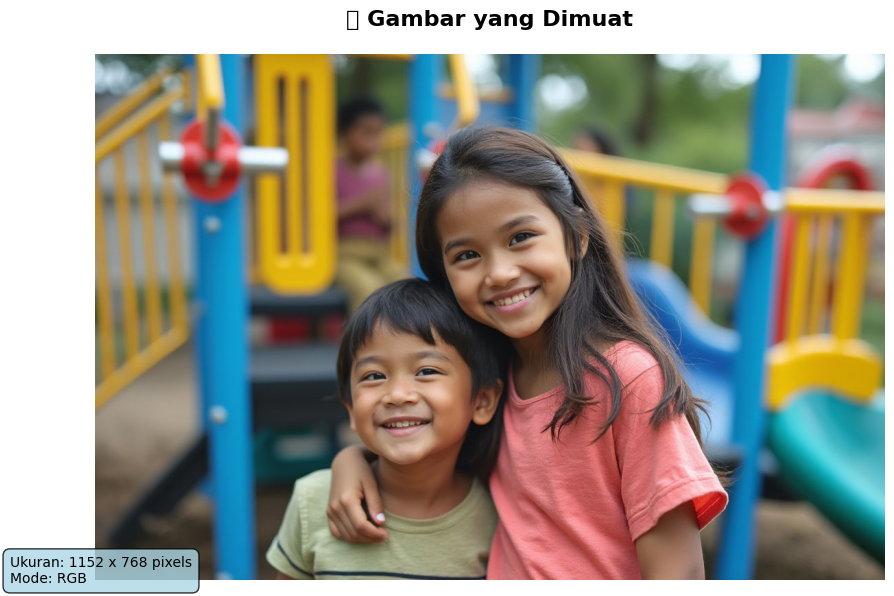

✅ Gambar berhasil ditampilkan!
📐 Resolusi: 1152 x 768 pixels
🎨 Total pixel: 884,736


In [4]:
# Visualisasi Gambar dengan Matplotlib
plt.figure(figsize=(10, 6))

# Tampilkan gambar
plt.imshow(img_pil)
plt.title('🖼️ Gambar yang Dimuat', fontsize=16, fontweight='bold', pad=20)

# Hilangkan axis untuk tampilan yang lebih bersih
plt.axis('off')

# Tambahkan informasi gambar sebagai text
info_text = f"Ukuran: {img_pil.size[0]} x {img_pil.size[1]} pixels\nMode: {img_pil.mode}"
plt.figtext(0.02, 0.02, info_text, fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Tampilkan dengan layout yang rapi
plt.tight_layout()
plt.show()

print("✅ Gambar berhasil ditampilkan!")
print(f"📐 Resolusi: {img_pil.size[0]} x {img_pil.size[1]} pixels")
print(f"🎨 Total pixel: {img_pil.size[0] * img_pil.size[1]:,}")

## Ekstraksi Informasi Dasar

Informasi dasar yang dapat diekstrak dari gambar digital:

**Dimensi Gambar:**
- **Tinggi (Height)**: Jumlah baris pixel
- **Lebar (Width)**: Jumlah kolom pixel  
- **Jumlah Channel**: 1 (grayscale), 3 (RGB), 4 (RGBA dengan transparency)

**Mode Warna:**
- **RGB**: Red-Green-Blue (warna penuh)
- **L**: Luminance (grayscale/hitam-putih)
- **RGBA**: RGB + Alpha channel (transparansi)

**Tipe Data:**
- Biasanya **uint8** (0-255) untuk gambar standar
- Kadang **float32** (0.0-1.0) untuk pemrosesan khusus

**Mengapa penting?** Informasi ini diperlukan untuk:
- Preprocessing sebelum input ke model Machine Learning/Deep Learning
- Menentukan strategi pemrosesan yang tepat
- Optimasi memory dan komputasi

In [5]:
# Metadata Gambar - Informasi Lengkap
print("📋 METADATA GAMBAR")
print("=" * 50)

# Informasi dari PIL Image
print("🖼️ INFORMASI PIL IMAGE:")
print(f"📐 Ukuran (W x H): {img_pil.size[0]} x {img_pil.size[1]} pixels")
print(f"🎨 Mode warna: {img_pil.mode}")
print(f"📁 Format file: {img_pil.format if img_pil.format else 'Generated/Unknown'}")

# Konversi ke numpy array untuk analisis lebih detail
img_array = np.array(img_pil)

print("\n🔢 INFORMASI NUMPY ARRAY:")
print(f"📊 Shape (H, W, C): {img_array.shape}")
print(f"💾 Tipe data: {img_array.dtype}")
print(f"🗃️ Ukuran memori: {img_array.nbytes:,} bytes ({img_array.nbytes/1024:.1f} KB)")

# Statistik nilai pixel
print("\n📈 STATISTIK PIXEL:")
print(f"🔽 Nilai minimum: {np.min(img_array)}")
print(f"🔼 Nilai maksimum: {np.max(img_array)}")
print(f"📊 Nilai rata-rata: {np.mean(img_array):.1f}")
print(f"📏 Standar deviasi: {np.std(img_array):.1f}")

# Informasi channel
if len(img_array.shape) == 3:
    height, width, channels = img_array.shape
    print(f"\n🌈 INFORMASI CHANNEL:")
    print(f"📏 Dimensi: {height} (tinggi) x {width} (lebar) x {channels} (channel)")
    if channels == 3:
        print("🎨 Channel: Red, Green, Blue (RGB)")
        # Statistik per channel
        for i, color in enumerate(['Red', 'Green', 'Blue']):
            channel_mean = np.mean(img_array[:, :, i])
            print(f"   {color}: rata-rata = {channel_mean:.1f}")
    elif channels == 1:
        print("⚫ Channel: Grayscale")
else:
    print(f"\n⚫ GRAYSCALE IMAGE:")
    print(f"📏 Dimensi: {img_array.shape[0]} x {img_array.shape[1]}")

print(f"\n✅ Total informasi berhasil diekstrak!")
print(f"💡 Aspect ratio: {img_pil.size[0]/img_pil.size[1]:.2f} (W/H)")

📋 METADATA GAMBAR
🖼️ INFORMASI PIL IMAGE:
📐 Ukuran (W x H): 1152 x 768 pixels
🎨 Mode warna: RGB
📁 Format file: JPEG

🔢 INFORMASI NUMPY ARRAY:
📊 Shape (H, W, C): (768, 1152, 3)
💾 Tipe data: uint8
🗃️ Ukuran memori: 2,654,208 bytes (2592.0 KB)

📈 STATISTIK PIXEL:
🔽 Nilai minimum: 0
🔼 Nilai maksimum: 255
📊 Nilai rata-rata: 113.0
📏 Standar deviasi: 57.6

🌈 INFORMASI CHANNEL:
📏 Dimensi: 768 (tinggi) x 1152 (lebar) x 3 (channel)
🎨 Channel: Red, Green, Blue (RGB)
   Red: rata-rata = 121.4
   Green: rata-rata = 116.6
   Blue: rata-rata = 101.2

✅ Total informasi berhasil diekstrak!
💡 Aspect ratio: 1.50 (W/H)


## Histogram Warna

**Histogram** adalah grafik yang menunjukkan distribusi nilai intensitas pixel dalam gambar:

**Konsep Dasar:**
- **Sumbu X**: Nilai intensitas pixel (0-255 untuk 8-bit)
- **Sumbu Y**: Frekuensi (jumlah pixel dengan nilai intensitas tertentu)
- **Per-Channel**: Dapat dibuat terpisah untuk Red, Green, dan Blue

**Interpretasi Histogram:**
- **Puncak di kiri (nilai rendah)**: Gambar gelap/underexposed
- **Puncak di kanan (nilai tinggi)**: Gambar terang/overexposed  
- **Distribusi merata**: Kontras yang baik
- **Puncak sempit**: Kontras rendah

**Kegunaan Praktis:**
- Analisis kualitas gambar dan pencahayaan
- Deteksi dominasi warna tertentu
- Preprocessing untuk color correction
- Feature extraction untuk computer vision

---


# Video: Memuat Data & Visualisasi

Video digital adalah rangkaian gambar (frame) yang ditampilkan berurutan pada kecepatan tertentu yang disebut **frame rate**. Ketika frame-frame ini diputar dengan cepat (biasanya 24-60 fps), mata manusia melihatnya sebagai gerakan yang halus. Video pada dasarnya adalah dimensi waktu yang ditambahkan pada gambar 2D, sehingga menjadi data 3D (tinggi × lebar × waktu).

## Tujuan Akhir Sesi:

- **Membaca file video** dari disk menggunakan OpenCV
- **Menampilkan beberapa frame** dari video sebagai gambar statis
- **Memahami informasi dasar video** seperti resolusi, jumlah frame, frame rate, dan durasi
- **Mengekstrak frame tertentu** untuk analisis lebih lanjut

**Catatan:** Sesi ini fokus pada pembacaan dan visualisasi dasar video, bukan pada manipulasi seperti pemotongan, transformasi, atau editing video yang kompleks.

In [6]:
# Setup & Instalasi untuk Video Processing
# OpenCV dan matplotlib sudah diinstall sebelumnya, tapi pastikan tersedia
# !pip install -q opencv-python matplotlib numpy

# Import library yang dibutuhkan untuk video processing
# (beberapa sudah diimport sebelumnya untuk image processing)
print("📹 Setup Video Processing")
print("=" * 40)

# Pastikan semua library sudah tersedia
try:
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    print("✅ OpenCV tersedia")
    print("✅ Matplotlib tersedia") 
    print("✅ NumPy tersedia")
except ImportError as e:
    print(f"❌ Error import: {e}")
    print("Jalankan: !pip install opencv-python matplotlib numpy")

# Tampilkan versi pustaka untuk video processing
print("\n📋 Versi pustaka untuk video:")
print(f"OpenCV: {cv2.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"NumPy: {np.__version__}")
print("\n✅ Setup video processing selesai!")

📹 Setup Video Processing
✅ OpenCV tersedia
✅ Matplotlib tersedia
✅ NumPy tersedia

📋 Versi pustaka untuk video:
OpenCV: 4.12.0
Matplotlib: 3.10.5
NumPy: 2.2.6

✅ Setup video processing selesai!


## Membaca File Video

**OpenCV (`cv2.VideoCapture`)** adalah tool yang paling umum digunakan untuk membaca video dalam Python:

**Format video umum:**
- **MP4**: Format paling populer, kompresi baik, kompatibilitas tinggi
- **AVI**: Format lama tapi masih banyak digunakan
- **MOV**: Format Apple, kualitas tinggi
- **MKV**: Format open-source dengan fitur lengkap

**Konsep penting:**
- **VideoCapture object**: Interface untuk membaca video frame demi frame
- **Frame**: Satu gambar dalam rangkaian video
- **Sequential reading**: Video dibaca berurutan dari awal ke akhir

**Strategi fallback:** Kita akan mencoba membaca file video lokal terlebih dahulu. Jika gagal, akan memberikan pesan error yang informatif karena membuat video sintetis cukup kompleks untuk tutorial pemula.

In [7]:
# Load Video dengan Error Handling
PATH_VIDEO = os.path.join(os.getcwd(), 'data', 'man_walking.mp4')  # Ganti dengan path video Anda

print("📹 Mencoba membaca video...")
print(f"🎯 Target file: {PATH_VIDEO}")

# Buat objek VideoCapture
cap = cv2.VideoCapture(PATH_VIDEO)

# Periksa apakah video berhasil dibuka
if cap.isOpened():
    print("✅ Video berhasil dibuka!")
    source_info = f"✅ Berhasil memuat: {PATH_VIDEO}"
    video_loaded = True
else:
    print(f"❌ Gagal membuka video: {PATH_VIDEO}")
    
    # Cek apakah file ada
    if not os.path.exists(PATH_VIDEO):
        print(f"📁 File tidak ditemukan: {PATH_VIDEO}")
        print("\n💡 Tips:")
        print("1. Pastikan file video ada di folder 'data/'")
        print("2. Coba format MP4, AVI, atau MOV")
        print("3. Periksa nama file dan ekstensi")
    else:
        print(f"📁 File ditemukan tapi tidak bisa dibaca")
        print("💡 Kemungkinan format tidak didukung atau file rusak")
    
    source_info = f"❌ Gagal memuat: {PATH_VIDEO}"
    video_loaded = False
    
    # Bersihkan resource
    cap.release()

print(f"\n📊 Status: {source_info}")
print(f"🎬 Video loaded: {video_loaded}")

if not video_loaded:
    print("\n⚠️ PERHATIAN:")
    print("Video tidak dapat dimuat. Bagian selanjutnya akan menampilkan error.")
    print("Silakan ganti PATH_VIDEO dengan file video yang valid.")

📹 Mencoba membaca video...
🎯 Target file: /Users/martinmanullang/Developer/if4021-handson/data/man_walking.mp4
✅ Video berhasil dibuka!

📊 Status: ✅ Berhasil memuat: /Users/martinmanullang/Developer/if4021-handson/data/man_walking.mp4
🎬 Video loaded: True


## Ekstraksi Informasi Dasar

Informasi dasar yang umum diperiksa dari video:

**Dimensi Video:**
- **Width (Lebar)**: Resolusi horizontal dalam pixel
- **Height (Tinggi)**: Resolusi vertikal dalam pixel
- **Resolusi umum**: 720p (1280×720), 1080p (1920×1080), 4K (3840×2160)

**Informasi Temporal:**
- **Frame Rate (FPS)**: Jumlah frame per detik (24, 30, 60 fps adalah umum)
- **Total Frame**: Jumlah total frame dalam video
- **Durasi**: Waktu total video = total frame ÷ fps

**Mengapa penting?**
- **Sinkronisasi**: Untuk menyelaraskan audio-video atau multiple camera
- **Analisis**: Menentukan sampling rate untuk computer vision
- **Preprocessing**: Resize, frame extraction, atau temporal analysis
- **Memory planning**: Estimasi kebutuhan storage dan processing power

In [8]:
# Metadata Video - Ekstraksi Informasi Lengkap
if video_loaded:
    print("📋 METADATA VIDEO")
    print("=" * 50)
    
    # Ambil informasi dasar dari video
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Hitung durasi (detik)
    duration = frame_count / fps if fps > 0 else 0
    
    print("📐 RESOLUSI & DIMENSI:")
    print(f"🖼️ Lebar: {width} pixels")
    print(f"🖼️ Tinggi: {height} pixels")
    print(f"📊 Resolusi: {width} × {height}")
    print(f"💡 Aspect ratio: {width/height:.2f}")
    
    # Klasifikasi resolusi
    if height >= 2160:
        res_class = "4K Ultra HD"
    elif height >= 1080:
        res_class = "Full HD (1080p)"
    elif height >= 720:
        res_class = "HD (720p)"
    else:
        res_class = "Standard Definition"
    print(f"🏷️ Klasifikasi: {res_class}")
    
    print("\n⏱️ INFORMASI TEMPORAL:")
    print(f"🎬 Frame rate: {fps:.2f} fps")
    print(f"🔢 Total frame: {frame_count:,}")
    print(f"⏰ Durasi: {duration:.2f} detik ({duration/60:.1f} menit)")
    
    # Klasifikasi frame rate
    if fps >= 60:
        fps_class = "High frame rate (smooth motion)"
    elif fps >= 30:
        fps_class = "Standard frame rate"
    elif fps >= 24:
        fps_class = "Cinema frame rate"
    else:
        fps_class = "Low frame rate"
    print(f"🏷️ Klasifikasi FPS: {fps_class}")
    
    print("\n💾 ESTIMASI DATA:")
    # Estimasi ukuran data (asumsi 3 bytes per pixel untuk RGB)
    bytes_per_frame = width * height * 3
    total_bytes = bytes_per_frame * frame_count
    print(f"📊 Bytes per frame: {bytes_per_frame:,} ({bytes_per_frame/1024/1024:.1f} MB)")
    print(f"📦 Total estimasi (RGB): {total_bytes:,} bytes ({total_bytes/1024/1024/1024:.1f} GB)")
    
    print(f"\n✅ Metadata berhasil diekstrak!")
    
    # Simpan informasi untuk digunakan nanti
    video_info = {
        'width': width,
        'height': height, 
        'fps': fps,
        'frame_count': frame_count,
        'duration': duration
    }
    
else:
    print("❌ Video tidak dimuat - tidak dapat mengekstrak metadata")
    print("Pastikan PATH_VIDEO menuju ke file video yang valid")

📋 METADATA VIDEO
📐 RESOLUSI & DIMENSI:
🖼️ Lebar: 1280 pixels
🖼️ Tinggi: 720 pixels
📊 Resolusi: 1280 × 720
💡 Aspect ratio: 1.78
🏷️ Klasifikasi: HD (720p)

⏱️ INFORMASI TEMPORAL:
🎬 Frame rate: 24.00 fps
🔢 Total frame: 192
⏰ Durasi: 8.00 detik (0.1 menit)
🏷️ Klasifikasi FPS: Cinema frame rate

💾 ESTIMASI DATA:
📊 Bytes per frame: 2,764,800 (2.6 MB)
📦 Total estimasi (RGB): 530,841,600 bytes (0.5 GB)

✅ Metadata berhasil diekstrak!


## Menampilkan Beberapa Frame

Video tidak dapat ditampilkan secara penuh langsung dalam Jupyter Notebook, tetapi kita dapat mengekstrak dan menampilkan frame-frame tertentu sebagai gambar statis.

**Strategi ekstraksi frame:**
- **Frame pertama (0)**: Biasanya menunjukkan scene pembuka
- **Frame tengah**: Memberikan gambaran konten di pertengahan video  
- **Frame terakhir**: Menunjukkan scene penutup

**Penting - Konversi warna:**
- **OpenCV default**: Format BGR (Blue-Green-Red)
- **Matplotlib display**: Membutuhkan RGB (Red-Green-Blue)
- **Solusi**: Gunakan `cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)` untuk konversi

**Navigasi frame:**
- `cap.set(cv2.CAP_PROP_POS_FRAMES, index)`: Melompat ke frame tertentu
- `cap.read()`: Membaca frame pada posisi saat ini

📹 Mengekstrak dan menampilkan frame...


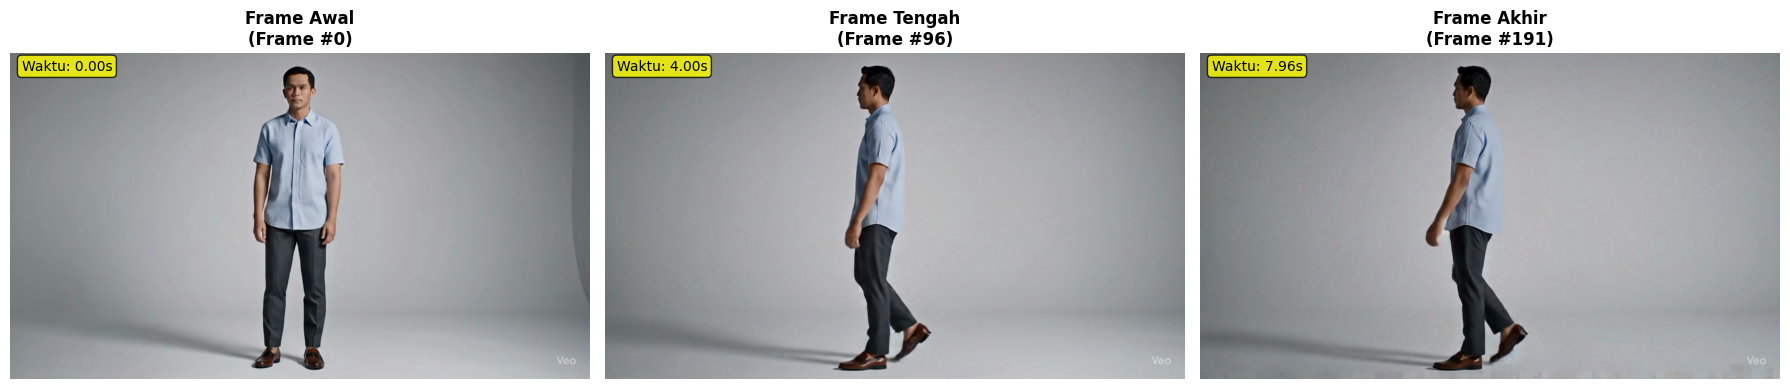

✅ Frame berhasil diekstrak!
📊 Resolusi frame: 1280 × 720
🎯 Frame yang diekstrak:
   Frame Awal: Frame #0 (waktu 0.00s)
   Frame Tengah: Frame #96 (waktu 4.00s)
   Frame Akhir: Frame #191 (waktu 7.96s)

💡 Total frame berhasil diekstrak: 3
🔄 Video capture resource dibersihkan


In [9]:
# Visualisasi Frame dari Video
if video_loaded:
    print("📹 Mengekstrak dan menampilkan frame...")
    
    # Tentukan frame yang akan diekstrak
    frame_first = 0
    frame_middle = frame_count // 2
    frame_last = max(0, frame_count - 1)
    
    frames_to_extract = [
        (frame_first, "Frame Awal"),
        (frame_middle, "Frame Tengah"), 
        (frame_last, "Frame Akhir")
    ]
    
    # Setup plot dengan 3 subplot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    extracted_frames = []
    
    for i, (frame_idx, title) in enumerate(frames_to_extract):
        # Set posisi frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        
        # Baca frame
        ret, frame = cap.read()
        
        if ret:
            # Konversi dari BGR ke RGB untuk display yang benar
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            extracted_frames.append(frame_rgb)
            
            # Tampilkan frame
            axes[i].imshow(frame_rgb)
            axes[i].set_title(f'{title}\n(Frame #{frame_idx})', fontsize=12, fontweight='bold')
            axes[i].axis('off')
            
            # Tambahkan informasi timestamp
            timestamp = frame_idx / fps
            axes[i].text(0.02, 0.98, f'Waktu: {timestamp:.2f}s', 
                        transform=axes[i].transAxes, fontsize=10,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8),
                        verticalalignment='top')
            
        else:
            # Jika gagal membaca frame
            axes[i].text(0.5, 0.5, f'❌ Gagal\nmembaca\n{title}', 
                        transform=axes[i].transAxes, fontsize=12,
                        horizontalalignment='center', verticalalignment='center')
            axes[i].set_title(f'{title} (Error)', fontsize=12)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Informasi ekstraksi
    print(f"✅ Frame berhasil diekstrak!")
    print(f"📊 Resolusi frame: {width} × {height}")
    print(f"🎯 Frame yang diekstrak:")
    for frame_idx, title in frames_to_extract:
        timestamp = frame_idx / fps
        print(f"   {title}: Frame #{frame_idx} (waktu {timestamp:.2f}s)")
    
    print(f"\n💡 Total frame berhasil diekstrak: {len(extracted_frames)}")
    
    # Bersihkan resource video capture
    cap.release()
    print("🔄 Video capture resource dibersihkan")
    
else:
    print("❌ Tidak dapat menampilkan frame - video tidak dimuat")
    print("Pastikan PATH_VIDEO menuju ke file video yang valid")
    
    # Tampilkan placeholder
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, title in enumerate(["Frame Awal", "Frame Tengah", "Frame Akhir"]):
        axes[i].text(0.5, 0.5, f'❌ Video\ntidak dimuat\n\n{title}', 
                    transform=axes[i].transAxes, fontsize=12,
                    horizontalalignment='center', verticalalignment='center')
        axes[i].set_title(f'{title} (No Video)', fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Playback video in a separate window using OpenCV
# Uses existing PATH_VIDEO variable. Press 'p' to pause/resume, 'q' or ESC to quit.

cap_playback = cv2.VideoCapture(PATH_VIDEO)

if not cap_playback.isOpened():
    print(f"❌ Tidak bisa membuka video untuk playback: {PATH_VIDEO}")
else:
    # Determine FPS and wait time per frame (ms)
    fps_play = cap_playback.get(cv2.CAP_PROP_FPS)
    if not fps_play or fps_play <= 0:
        fps_play = video_info.get('fps', 30) if 'video_info' in globals() else 30.0
    wait_ms = int(max(1, round(1000.0 / fps_play)))

    window_name = "Video Playback (press 'p' pause, 'q' quit)"
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    paused = False

    print(f"▶️ Memulai playback: {PATH_VIDEO}  |  FPS: {fps_play:.2f}  |  Tekan 'p' untuk pause, 'q' untuk keluar")

    while True:
        if not paused:
            ret, frame_play = cap_playback.read()
            if not ret:
                # End of video
                print("⏹️ Selesai memutar video")
                break

            # Optional: overlay info (frame # and timestamp)
            frame_no = int(cap_playback.get(cv2.CAP_PROP_POS_FRAMES))
            timestamp = frame_no / fps_play
            overlay_text = f"Frame: {frame_no}  Time: {timestamp:.2f}s"
            cv2.putText(frame_play, overlay_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (0, 255, 255), 2, cv2.LINE_AA)

            cv2.imshow(window_name, frame_play)

        key = cv2.waitKey(wait_ms if not paused else 100) & 0xFF
        if key == ord('p'):
            paused = not paused
            state = "PAUSED" if paused else "RESUMED"
            print(f"⏸️ Playback {state}")
        elif key == ord('q') or key == 27:  # 'q' or ESC
            print("⏏️ User requested exit")
            break

    cap_playback.release()
    cv2.destroyAllWindows()

▶️ Memulai playback: /Users/martinmanullang/Developer/if4021-handson/data/man_walking.mp4  |  FPS: 24.00  |  Tekan 'p' untuk pause, 'q' untuk keluar
⏏️ User requested exit
⏏️ User requested exit


: 